In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [2]:
iris_data = load_iris()

X = iris_data.data[:,:2]
y = iris_data.target

X -= X.mean(axis=0)
X /= X.std(axis=0)
#X, y = shuffle(X, y)

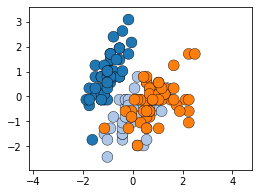

In [3]:
from weaklabels.WLvisualizer import plot_multilabel_scatter
from sklearn.preprocessing import OneHotEncoder

Y = OneHotEncoder(sparse=False).fit_transform(y.reshape(-1,1))

plot_multilabel_scatter(X, Y);

In [4]:
X_list = np.split(X, 5)
Y_true_list = np.split(Y, 5)

proportion_list = [Y_aux.mean(axis=0) for Y_aux in Y_true_list]

In [5]:
proportion_list

[array([1., 0., 0.]),
 array([0.66666667, 0.33333333, 0.        ]),
 array([0., 1., 0.]),
 array([0.        , 0.33333333, 0.66666667]),
 array([0., 0., 1.])]

In [6]:
z_list = [np.tile(proportion_list[i], (len(Y_true_list[i]), 1)) for i in range(len(proportion_list))]

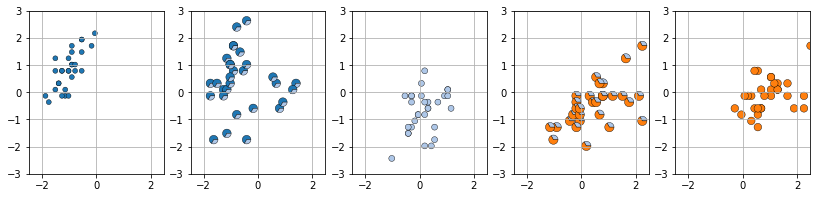

In [8]:
fig, ax_list = plt.subplots(1, len(z_list), figsize=(14, 3))
for i in range(len(z_list)):
    plot_multilabel_scatter(X_list[i], z_list[i], fig=fig, ax=ax_list[i])
    ax_list[i].set_xlim(-3, 3)
    ax_list[i].set_ylim(-3, 3)
    ax_list[i].grid()

Consider using an iterative method that considers the proportions as prior probabilities for the samples, and updates with the models probability outputs.